## PROJECT 1: MOBILE PHONE PRICE PREDICTION

### 尚晴宇 518021910472

## 简介
在此项目中，我们使用多种分类算法（`Naive Bayes`,`Logistic Regression`,`Linear Support Vector Machine`）来对一个小规模数据集进行监督学习，并比较不同的算法在测试集上进行分类的表现。该[数据集](https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv)是一个关于智能手机价格的数据集，它给出了一款手机的多个特征维度，并给出了该款手机所在的价格区间。我的模型尝试学习手机的这些特征维度与它最终的价格区间之间的联系，以达到给定一款手机的特征取值，模型将可以准确预测该手机所在的价格区间的效果。

## 数据集概览
数据集以csv文件的形式给出，我们可以使用Pandas来读取数据集，并简单观察数据集的特征。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Optional, List
from sklearn.metrics import plot_roc_curve, roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import time

In [2]:
data = pd.read_csv("./data.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

以下是我们数据集的特征属性<br>
* battery_power: 手机的电池容量（单位：mAh）
* blue: 是否支持蓝牙
* clock_speed: 手机处理器的时钟频率（GHz）
* dual_sim: 是否支持双卡
* fc: 手机前置摄像头像素（MP）
* four_g: 是否支持4G网络
* int_memory: 内置存储容量（GiB）
* m_dep: 意义暂不明
* mobile_wt: 手机重量（g）
* n_cores: 手机处理器核心数
* pc: 手机主摄像头像素（MP）
* px_height: 屏幕高度像素分辨率（像素）
* px_width: 屏幕宽度像素分辨率（像素）
* ram: 手机RAM容量（MiB）
* sc_h: 屏幕宽度（cm）
* sc_w: 屏幕高度（cm）
* talk_time: 单次充电的最长持续通话时间
* three_g: 是否支持3G网络
* touch_screen: 是否支持触摸屏
* wifi: 是否支持WiFi网络
* price_range: 手机的价格区间，数值越高表示价格越高，为预测目标

In [4]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
data.shape

(2000, 21)

由以上可知，该数据集共有2000条已分类数据，每条数据有21维度，其中前20维为特征，第21维为价格标签。我们的任务是将该数据集按8:1:1划分为训练集，验证集和测试集，观察不同机器学习方法的准确率。

## 数据预处理

为了简化问题为二分类问题，我们需要将价格标签分为两类，再将数据集拆分并写入三个文件中。

In [6]:
y = data['price_range']
data.pop('price_range')
y = y.replace({1: 0,
               2: 1,
               3: 1})
data['price_range'] = y

train, valid_test = train_test_split(data, test_size = 0.2)
valid, test = train_test_split(valid_test, test_size = 0.5)
train.to_csv('train.csv',index=0)
valid.to_csv('valid.csv',index=0)
test.to_csv('test.csv',index=0)

为了避免数据使用过程中频繁读取文件以及拆分特征和标签，这里提前准备好未经归一化或离散化的数据，特征部分以 x_ 为前缀，标签部分以 y_ 为前缀。之后在实现不同机器学习方法时有不同的预处理操作。

In [7]:
x = data.drop('price_range', axis = 1)
# ran =
# np.random.rand() * 200 // 2   #取巧的方法，找效果最好的划分种子
# ran = int(ran)
# print(ran)
ran = 94
x_train, x_remain, y_train, y_remain = train_test_split(x, y, test_size = 0.2, random_state=ran)
x_valid, x_test, y_valid, y_test = train_test_split(x_remain, y_remain, test_size=0.5, random_state=ran)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(1600, 20)
(200, 20)
(200, 20)


## 机器学习算法实现

以下依次展示三种不同的机器学习方法实现
- Naive Bayes
- Logistic regression
- Linear Support Vector Machine

为了对结果进行对比，在介绍每种方法实现并测试前，首先定义统计类，统计Accuracy、TPR、FPR、TNR、FNR以及训练和测试时间等多种模型评价指标。

In [8]:
class Statistic:      #从test中返回
    accuracy = 0.0
    TPR = 0.0
    FPR = 0.0
    TNR = 0.0
    FNR = 0.0
    train_time = 0.0  #unit: ms
    test_time = 0.0
    test_labels = []
    test_results = []

    def report(self):
        print("Accuracy: %.2f\n"
              "TPR: %.2f\n"
              "FPR: %.2f\n"
              "TNR: %.2f\n"
              "FNR: %.2f\n"
              "train_time: %.2f ms\n"
              "test_time: %.2f ms" %(self.accuracy,self.TPR,self.FPR,self.TNR,self.FNR,self.train_time,self.test_time))

    def report_for_svm(self):
        print("Accuracy: %.2f\n"
              "train_time: %.2f ms\n"
              "test_time: %.2f ms" %(self.accuracy,self.train_time,self.test_time))

### 1. Naive Bayes

#### 数据预处理
数据集中某些维度取值是连续的，为了应用朴素贝叶斯我们要将它们进行离散化，这里我们使"train"数据集中这些维度每个数据同时除以最大值的一半（多一点点），简单地分为两类（两个区间）。同时将分类标准应用到"test"数据集。

In [9]:
columns_max = np.max(x_train, axis=0)
print(columns_max)
x_bayes_train = x_train // (columns_max / 2 + 0.01)
x_bayes_test = x_test // (columns_max / 2 + 0.01)

battery_power    1997.0
blue                1.0
clock_speed         3.0
dual_sim            1.0
fc                 18.0
four_g              1.0
int_memory         64.0
m_dep               1.0
mobile_wt         200.0
n_cores             8.0
pc                 20.0
px_height        1920.0
px_width         1998.0
ram              3998.0
sc_h               19.0
sc_w               18.0
talk_time          20.0
three_g             1.0
touch_screen        1.0
wifi                1.0
dtype: float64


In [10]:
def bayes_train(train_matrix, train_category):
    num_attr = len(train_matrix[0])
    p0_attr_num = np.zeros(num_attr); p1_attr_num = np.zeros(num_attr)
    p0_num = 0.0; p1_num = 0.0
    for i in range(len(train_matrix)):
        if train_category[i] == 1:
            p1_attr_num += train_matrix[i]
            p1_num += 1
        else:
            p0_attr_num += train_matrix[i]
            p0_num += 1
    p1_vector = p1_attr_num/p1_num
    p0_vector = p0_attr_num/p0_num
    p0_prob = p0_num / (p0_num + p1_num)
    return p0_vector, p1_vector, p0_prob

def bayes_classify(vec2classify, p0vector, p1vector, p_price0):
    p_0 = p_price0
    p_1 = 1.0 - p_price0
    for i in range(len(vec2classify)):
        if vec2classify[i] == 0:
            p_0 *= 1 - p0vector[i]
            p_1 *= 1 - p1vector[i]
        else:
            p_1 *= p1vector[i]
            p_0 *= p0vector[i]
    if p_0 > p_1:
        return 0
    else:
        return 1

def bayes_test(test_matrix, test_category, p0vector, p1vector, p_price0):
    test_num = len(test_matrix)
    sta = Statistic()
    stat_counters = [
        [0, 0],
        [0, 0]
    ]
    for i in range(test_num):
        stat_counters[bayes_classify(test_matrix[i], p0vector, p1vector, p_price0)][test_category[i]] += 1
    tp = stat_counters[1][1]
    tn = stat_counters[0][0]
    fp = stat_counters[1][0]
    fn = stat_counters[0][1]
    total = tp + tn + fp + fn
    sta.accuracy = (tp + tn) / total * 100
    sta.TPR = tp / total * 100
    sta.TNR = tn / total * 100
    sta.FPR = fp / total * 100
    sta.FNR = fn / total * 100
    return sta

#### 训练与测试

In [11]:
time1= time.time()
p0vec, p1vec, p0_probability = bayes_train(x_bayes_train.values, y_train.values)
time2 = time.time()
bayes_sta = bayes_test(x_bayes_test.values, y_test.values, p0vec, p1vec, p0_probability)
time3 = time.time()

bayes_sta.train_time = (time2 - time1) * 1000
bayes_sta.test_time = (time3 - time2) * 1000
bayes_sta.report()

Accuracy: 92.50
TPR: 49.50
FPR: 5.00
TNR: 43.00
FNR: 2.50
train_time: 3.92 ms
test_time: 3.89 ms


### 2.1 Logistic Regression Version_1

函数定义如下（模型参数在函数内声明）：

In [12]:
def sigmoid(inx):
    return 1.0 / (1 + np.exp(-inx))

def gradient_ascent(train_matrix, train_category):
    label_mat = np.reshape(train_category, (len(train_matrix), 1))
    m, n = np.shape(train_matrix)
    alpha = 0.001
    max_cycles = 100
    weights = np.ones((n,1))
    for k in range(max_cycles):
        h = sigmoid(np.dot(train_matrix, weights))
        error = label_mat - h
        weights = weights + alpha * np.dot(train_matrix.transpose(), error)
    return weights

def lr_test(test_matrix, test_category, weights):
    stat_counters = [
        [0, 0],
        [0, 0]
    ]
    sta = Statistic()
    for i in range(len(test_matrix)):
        sta.test_labels.append(test_category[i])
        if sigmoid(np.dot(test_matrix[i], weights)) > 0.5:
            sta.test_results.append(1)
            if test_category[i] == 1:
                stat_counters[1][1] += 1
            else:
                stat_counters[1][0] += 1
        else:
            sta.test_results.append(0)
            if test_category[i] == 0:
                stat_counters[0][0] += 1
            else:
                stat_counters[0][1] += 1
    tp = stat_counters[1][1]
    tn = stat_counters[0][0]
    fp = stat_counters[1][0]
    fn = stat_counters[0][1]
    total = tp + tn + fp + fn
    sta.accuracy = (tp + tn) / total * 100
    sta.TPR = tp / total * 100
    sta.TNR = tn / total * 100
    sta.FPR = fp / total * 100
    sta.FNR = fn / total * 100
    return sta

#### 数据预处理
使用sklearn的StandardScaler()进行归一化。

In [13]:
ss = StandardScaler()
x_lr_train = pd.DataFrame(ss.fit_transform(x_train))
x_lr_test = pd.DataFrame(ss.fit_transform(x_test))

#### 训练与测试

In [14]:
time1= time.time()
weight = gradient_ascent(x_lr_train.values, y_train.values)
time2= time.time()
lr_sta = lr_test(x_lr_test.values, y_test.values, weight)
time3= time.time()

lr_sta.train_time = (time2 - time1) * 1000
lr_sta.test_time = (time3 - time2) * 1000
lr_sta.report()

Accuracy: 100.00
TPR: 52.00
FPR: 0.00
TNR: 48.00
FNR: 0.00
train_time: 5.22 ms
test_time: 1.41 ms


### 2.2 Logistic Regression Version_2

由于在最初实现版本中没有用到"valid"数据集，以下新实现的逻辑回归补充了对于valid_loss（均方差）的计算，并可作为梯度下降终止条件。同时在每个epoch中分batch进行训练，并记录和利用上一次的参数调整，从而使模型更快收敛。

函数定义如下：

In [15]:
def descent(data_x: pd.DataFrame, data_labels: pd.Series, cur_params: np.ndarray,
            last_movement: np.float64, learning_rate, movement_rate) -> Tuple[np.ndarray, np.float64]:
    movement = -gradient(data_x, data_labels, cur_params) * learning_rate + movement_rate * last_movement
    return cur_params + movement, movement

def gradient(data_x: pd.DataFrame, data_labels: pd.Series, cur_params: np.ndarray) -> np.ndarray:
    grad_sum = sum(
        np.dot(X.T, logistic(X, cur_params) - label) for (_, X), label in zip(data_x.iterrows(), data_labels))
    return grad_sum

def logistic(data_vector: pd.Series, params: np.ndarray) -> np.float64:
    return 1 / (1 + np.exp(-np.dot(data_vector.values.T, params)))

def loss(data_x: pd.DataFrame, data_labels: pd.Series, cur_params: np.ndarray) -> float:
    loss_sum = np.float64(0.0)
    for (_, X), label in zip(data_x.iterrows(), data_labels):
        log = logistic(X, cur_params)
        loss_sum += (label - log) * (label - log)
    return loss_sum

def split_df(df: pd.DataFrame, batch_size: int):
    return np.array_split(df, int((df.shape[0] + batch_size - 1) / batch_size))

def split_1d(ary, batch_size: int):
    return np.array_split(ary, int((len(ary) + batch_size - 1) / batch_size))

def train(train_mat, train_lab, valid_mat, valid_lab, learning_rate = 0.01, movement_rate = 0.1, batch_size: int = 200,
          valid_loss_threshold: Optional[float] = None, max_epoch: Optional[int] = None):
    threshold_enabled = valid_loss_threshold is not None
    epoch_enabled = max_epoch is not None
    assert threshold_enabled or epoch_enabled
    params = np.ones(len(train_mat.columns))
    epoch = 0
    train_loss: List[float] = []
    valid_loss: List[float] = []
    last_movement = np.float64(0.0)
    while True:
        epoch += 1
        epoch_train_loss = 0.0
        epoch_valid_loss = 0.0
        for batch, batch_label in zip(split_df(train_mat, batch_size),
                                      split_1d(train_lab, batch_size)):
            params, last_movement = descent(batch, batch_label, params, last_movement, learning_rate, movement_rate)
            epoch_train_loss += loss(batch, batch_label, params)
        for valid_batch, valid_batch_label in zip(split_df(valid_mat, batch_size),
                                                  split_1d(valid_lab, batch_size)):
            epoch_valid_loss += loss(valid_batch, valid_batch_label, params)
        epoch_train_loss = epoch_train_loss / train_mat.shape[0]
        epoch_valid_loss = epoch_valid_loss / valid_mat.shape[0]
        train_loss.append(epoch_train_loss)
        valid_loss.append(epoch_valid_loss)
        print(f'Epoch: {epoch}, Train Loss: {epoch_train_loss:.4f}, Valid loss: {epoch_valid_loss:.4f}')
        if threshold_enabled and epoch_valid_loss <= valid_loss_threshold:
            return params, epoch, train_loss, valid_loss
        if epoch_enabled and epoch == max_epoch:
            return params, epoch, train_loss, valid_loss

def lr2_show(name, sta, epoch, train_loss, valid_loss): #draw roc picture
    lw = 2
    plt.figure()
    epoch_list = np.arange(1, epoch + 1)
    plt.plot(epoch_list, train_loss, color='darkorange',
             lw=lw, label='Loss on train set')
    plt.plot(epoch_list, valid_loss, color='navy',
             lw=lw, label='Loss on valid set')
    plt.xlim([0.0, epoch + 1])
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.title(f'Loss curve of {name}')
    plt.legend(loc="lower right")
    plt.show()

    plt.figure()
    fpr, tpr, threshold = roc_curve(sta.test_labels, sta.test_results)
    auc = roc_auc_score(sta.test_labels, sta.test_results)
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC of {name}')
    plt.legend(loc="lower right")
    plt.show()

#### 数据预处理
在归一化的基础上为每个样本的特征向量增加一维，全部为1，作为线性变换的常数项。

In [16]:
ss = StandardScaler()
x_lr_train = pd.DataFrame(ss.fit_transform(x_train))
x_lr_valid = pd.DataFrame(ss.fit_transform(x_valid))
x_lr_test = pd.DataFrame(ss.fit_transform(x_test))
x_lr_train.insert(len(x_lr_train.columns), len(x_lr_train.columns), 1)
x_lr_valid.insert(len(x_lr_valid.columns), len(x_lr_valid.columns), 1)
x_lr_test.insert(len(x_lr_test.columns), len(x_lr_test.columns), 1)

#### 训练与测试

Epoch: 1, Train Loss: 0.1139, Valid loss: 0.0464
Epoch: 2, Train Loss: 0.0324, Valid loss: 0.0304
Epoch: 3, Train Loss: 0.0271, Valid loss: 0.0273
Epoch: 4, Train Loss: 0.0248, Valid loss: 0.0254
Epoch: 5, Train Loss: 0.0232, Valid loss: 0.0239
Epoch: 6, Train Loss: 0.0219, Valid loss: 0.0227
Epoch: 7, Train Loss: 0.0209, Valid loss: 0.0217
Epoch: 8, Train Loss: 0.0200, Valid loss: 0.0208
Epoch: 9, Train Loss: 0.0193, Valid loss: 0.0201
Epoch: 10, Train Loss: 0.0187, Valid loss: 0.0195
Epoch: 11, Train Loss: 0.0181, Valid loss: 0.0189
Epoch: 12, Train Loss: 0.0176, Valid loss: 0.0184
Epoch: 13, Train Loss: 0.0171, Valid loss: 0.0180
Epoch: 14, Train Loss: 0.0167, Valid loss: 0.0175
Epoch: 15, Train Loss: 0.0164, Valid loss: 0.0172
Epoch: 16, Train Loss: 0.0160, Valid loss: 0.0168
Epoch: 17, Train Loss: 0.0157, Valid loss: 0.0165
Epoch: 18, Train Loss: 0.0154, Valid loss: 0.0162
Epoch: 19, Train Loss: 0.0152, Valid loss: 0.0160
Epoch: 20, Train Loss: 0.0149, Valid loss: 0.0157
Epoch: 21

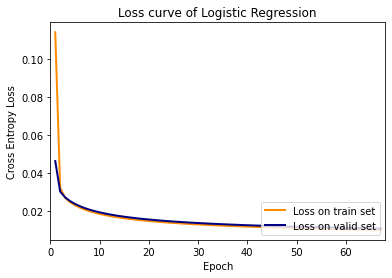

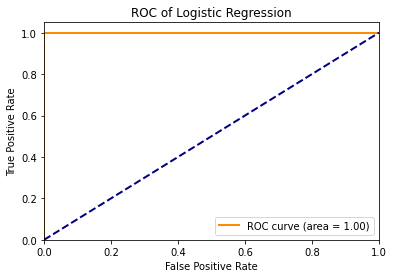

In [17]:
time1= time.time()
parameter, epochs, tra_loss, val_loss = train(x_lr_train, y_train, x_lr_valid, y_valid, valid_loss_threshold=0.011)
time2= time.time()
lr2_sta = lr_test(x_lr_test.values, y_test.values, parameter)
time3= time.time()

lr2_sta.train_time = (time2 - time1) * 1000
lr2_sta.test_time = (time3 - time2) * 1000
lr2_sta.report()
lr2_show("Logistic Regression", lr2_sta, epochs, tra_loss, val_loss)

### 3. Linear Support Vector Machine

#### 数据预处理
不需要特殊的预处理

#### 训练与测试
调用了sklearn库进行训练与测试

Accuracy: 98.50
train_time: 79.26 ms
test_time: 3.09 ms


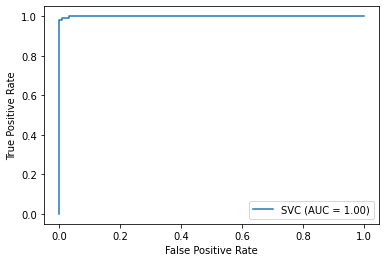

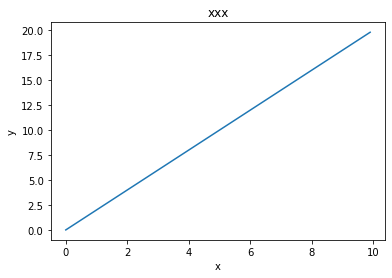

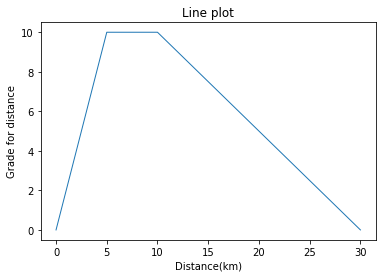

<Figure size 432x288 with 0 Axes>

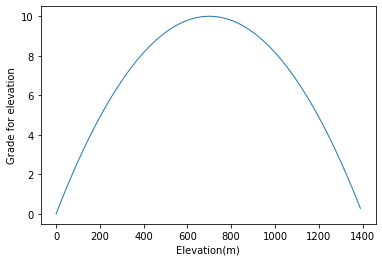

<Figure size 432x288 with 0 Axes>

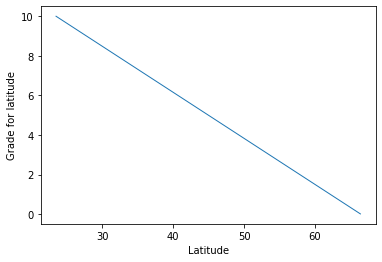

<Figure size 432x288 with 0 Axes>

In [18]:
clf = svm.SVC(probability=True)
time1 = time.time()
clf.fit(x_train, y_train.ravel())
time2 = time.time()
score = clf.score(x_test, y_test)
time3 = time.time()

svm_sta = Statistic()
svm_sta.accuracy = score * 100
svm_sta.train_time = (time2 - time1) * 1000
svm_sta.test_time = (time3 - time2) * 1000
svm_sta.report_for_svm()

plot_roc_curve(clf, x_test, y_test)
plt.show()

x = np.arange(0, 10, 0.1)
y = 2 * x

plt.xlabel('x')
plt.ylabel('y')
plt.title("xxx")
plt.plot(x, y)
plt.show()

x = [0,5,10,15,20,25,30]
y = [0,10,10,7.5,5,2.5,0]
plt.figure() #创建绘图对象
plt.plot(x,y,linewidth=1)  #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Distance(km)") #X轴标签
plt.ylabel("Grade for distance") #Y轴标签
plt.title("Line plot") #图标题
plt.show() #显示图
plt.savefig("line.jpg") #保存图

x = np.arange(0, 1400, 10)

y = x / 35 - x * x / 49000
plt.figure() #创建绘图对象
plt.plot(x,y,linewidth=1)  #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Elevation(m)") #X轴标签
plt.ylabel("Grade for elevation") #Y轴标签
# plt.title("Line plot") #图标题
plt.show() #显示图
plt.savefig("line.jpg") #保存图

x = np.arange(23.5, 66.5, 0.1)

y =  - x * 10 / 43 + 15.46
plt.figure() #创建绘图对象
plt.plot(x,y,linewidth=1)  #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("Latitude") #X轴标签
plt.ylabel("Grade for latitude") #Y轴标签
# plt.title("Line plot") #图标题
plt.show() #显示图
plt.savefig("line.jpg") #保存图

## 总结与分析

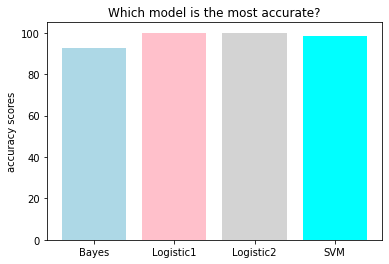

In [19]:
models = ['Bayes', 'Logistic1', 'Logistic2', 'SVM']
acc_scores = [bayes_sta.accuracy, lr_sta.accuracy, lr2_sta.accuracy, svm_sta.accuracy]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

我们一共实现并测试了四个模型。第一个是`Naive Bayes`模型，第二、三个是`Logistic Regression`模型，第四是`SVM`模型。

从测试结果来看，`Naive Bayes`模型的准确率（Accuracy）最低，多次测试显示其准确率均在90%上下浮动，且受数据集分割的影响严重，这里我选定了一个随机效果很好的随机种子，从而使得每次结果都为92.5%。这是因为朴素贝叶斯假设输入数据点的每个维度之间都是不相关的，这一假设过于理想，例如，`price_range`较高的手机，其各项数值通常都同步提升。但优点在于实现相对简单，训练及测试时间较短。我们对于所有连续特征只进行了简单的二分段，分段点选取不够严谨，按中位数或均值分段将提高可解释性，但模型本质相同。

`Logistic Regression`模型是三者中准确率最高的，归一化对逻辑回归非常重要。对比两个版本的实现，版本二应该更快收敛（学习率高，分batch，带惯性），但却慢了2000倍！可能是由于python对于数学计算做了优化，或是数据集切片和计算loss等操作过多导致其训练时间较长，说明某些优化操作应该应用于更复杂庞大的场景。从ROC曲线可以看到，其对测试集的分配效果接近理想分类器。在实现的过程中，我体验到学习率和batch_size的选择对模型的成功很重要。

`SVM`模型对于线性可分的二分类数据集有极强的分类效果。从ROC曲线可以看到它的结果也基本等同于理想分类器，且性能表现极佳。

各模型的训练与测试时间如下表所示。

In [20]:
index=['Training time(s)','Testing time(s)']
res_table=pd.DataFrame({
    'Naive Bayes': pd.Series([bayes_sta.train_time,bayes_sta.test_time],index=index),
    'Logistic Regression 1': pd.Series([lr_sta.train_time, lr_sta.test_time],index=index),
    'Logistic Regression 2': pd.Series([lr2_sta.train_time, lr2_sta.test_time],index=index),
    'SVM': pd.Series([svm_sta.train_time,svm_sta.test_time],index=index)
})
res_table

,Naive Bayes,Logistic Regression 1,Logistic Regression 2,SVM
Training time(s),3.916025,5.217075,14262.683868,79.255104
Testing time(s),3.889084,1.405954,1.462221,3.091812


测试时间上朴素贝叶斯的测试时间最长，因为计算量最大。SVM的训练时间很长，但精确度很高。综合时间和正确率的表现，简单的逻辑回归是最优秀的。
